# Project 2

Alex Hindelang and Florian Michael-Schwarzinger

# Q: When is CAR-T gene therapy most effective in leukemia treatment?

An experimental new "living drug" to fight cancer is being put to use: genetically modified T cells. The cells are altered with a chimeric antigen receptor protein (denoted by the CAR acronym), which has the ability to target specific cells and is often derived from viruses like HIV. This is one of the most promising therapies for cancer treatment, but it comes with some potential dangers. The proliferation of CAR-T cells in the body can lead to inflammation and release of toxins (cytokine release syndrome, a.k.a. CRS). As such, it is important to monitor both the CAR-T cell growth and the cancerous cell growth.

# Methods:

In [9]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

We will first use a function to define the system values.

In [10]:
def make_system(Tbirth, Tdeath, cancerbirth, cancerdeath, killrate, dt, carT, cancer):
    """Make a system object of different rates    
    returns: System object
    """
    init = State(carT = carT, cancer = cancer) 

    t0 = 0
    t_end = 365
    #The treatment's half-life is about 16.8, so the results should be available quickly.

    return System(init=init, t0=t0, t_end=t_end, dt=dt, Tbirth = Tbirth, Tdeath = Tdeath, 
                  cancerbirth = cancerbirth, cancerdeath = cancerdeath, killrate = killrate)

Then we need to be able to plot the results in terms of number of cells.

In [3]:
def plot_results(x, y):
    """Plot the results of the CAR-T model
    
    x: TimeSeries
    y: TimeSeries
    """
    plot(x, '--', label='CAR-T')
    plot(y, '-', label='Cancer cells')
    decorate(xlabel='Time (days)',
             ylabel='Number of cells') 
    #will it be number of cells? or concentration?

This function updates the model. The cancer is killed by the CAR-T cells, so that is an added factor along with natural birth and death.

In [4]:
def update_func(state, dt, system):
    """Update the CAR-T model.
    
    state: State (x, y)
    t: time
    system: System object
    
    returns: State (xy)
    """
    carT, cancer = state
    unpack(system)
    
    dcarTdt = Tbirth*carT - Tdeath*carT
    dcancerdt = cancerbirth*cancer - cancerdeath*cancer - killrate*carT
    
    carT += dcarTdt
    cancer += dcancerdt
    
    return State(carT = carT, cancer = cancer)

Then we run the simulation over a period of time.

In [5]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], dt, system)
    
    return frame

All data on the CAR-T treatment is based off of the FDA approved treatment Kymriah (tisagenlecleucel)

Studies of T cell replication place the replication rate as anywhere from every 10 days to every 110 days. Once again, averaging this, we get a replication every 60 days.

The elimination half-life of the drug is 16.8 days, which means each day there is 2.07% less of the drug. In other words, it is .9703 times its original.

Cancer cell replication is random, and as such we are sweeping its replication rate.

Cancer cells, on their own, do not really die. That is their nature; they replicate unmitigated.

T cells kill 2-16 targeted cells per day. This is averaged as 9 cells per day per active T cell.

Starting dose is 1.612e8 cells. We are making the assumption that the patient is the average weight of an adult, 62 kg, and the dose is 2.6e6 cells per kg body weight (the average of the lowest and highest dosages).

The starting value of cancerous cells is 2.5e10 cells, based on the criterion that early stages of leukemia begin with 5,000 cells per uL blood and the assumption that an adult has 5L blood.

In [11]:
system = make_system(1.0167, 0.9703, 1.1, 0, 9, 1, 1.612e8, 2.5e9)

,values
init,carT 1.612000e+08 cancer 2.500000e+09 ...
t0,0
t_end,365
dt,1
Tbirth,1.0167
Tdeath,0.9703
cancerbirth,1.1
cancerdeath,0
killrate,9


In [12]:
results = run_simulation(system, update_func)

,carT,cancer
0,1.612000e+08,2.500000e+09
1,1.686797e+08,3.799200e+09
2,1.765064e+08,6.460203e+09
3,1.846963e+08,1.197787e+10
4,1.932662e+08,2.349126e+10
5,2.022338e+08,4.759224e+10
6,2.116174e+08,9.812361e+10
7,2.214365e+08,2.041550e+11
8,2.317111e+08,4.267326e+11
9,2.424625e+08,8.940531e+11


# Results:

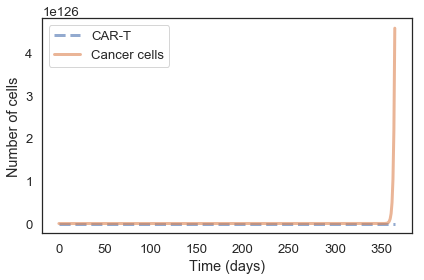

In [14]:
plot_results(results.carT, results.cancer)

THIS IS TENTATIVE. When the cancer replication rate is low (below [x]), the CAR-T can decrease and eliminate the cancer cells. When it is above [X], the cancer overtakes the CAR-T.

# Interpretation:

CAR-T therapy is a powerful tool for combating cancer cells. However, there are times where the T cells cannot replicate fast enough to overtake the cancer. It is also important to consider that the CAR-T in itself can cause health issues, so at a very low rate of cancer replication a less volatile treatment should be considered. That being said, if the cancer is replicating at a rate of [X] to [Y], it is effectively controlled by CAR-T therapy.